In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
import pandas as pd
data = {
    "월": ["1월", "2월", "3월", "4월", "5월", "6월", "7월"],
    "계정 전체 도달 수": [1264330, 1156165, 1076015, 2241077, 1967485, 2531168, 2852662],
    "게시물별 도달 수": [36124, 33033, 26900, 33956, 26952, 31640, 49184],
    "팔로워 수": [46829, 49894, 53883, 58665, 66157, 71217, 74765]
}

df = pd.DataFrame(data)

df


,월,계정 전체 도달 수,게시물별 도달 수,팔로워 수
0,1월,1264330,36124,46829
1,2월,1156165,33033,49894
2,3월,1076015,26900,53883
3,4월,2241077,33956,58665
4,5월,1967485,26952,66157
5,6월,2531168,31640,71217
6,7월,2852662,49184,74765


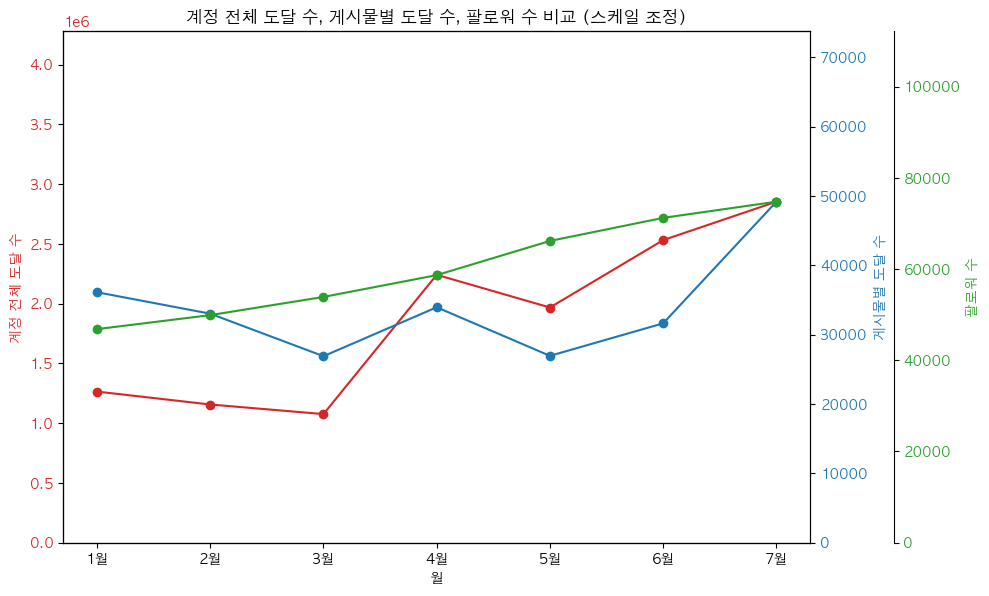

In [15]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('월')
ax1.set_ylabel('계정 전체 도달 수', color=color)
ax1.plot(df["월"], df["계정 전체 도달 수"], label="계정 전체 도달 수", color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('게시물별 도달 수', color=color)
ax2.plot(df["월"], df["게시물별 도달 수"], label="게시물별 도달 수", color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()  
color = 'tab:green'
ax3.spines['right'].set_position(('outward', 60))      
ax3.set_ylabel('팔로워 수', color=color)
ax3.plot(df["월"], df["팔로워 수"], label="팔로워 수", color=color, marker='o')
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title("계정 전체 도달 수, 게시물별 도달 수, 팔로워 수 비교 (스케일 조정)")
ax1.set_ylim(0, max(df["계정 전체 도달 수"]) * 1.5)  
ax2.set_ylim(0, max(df["게시물별 도달 수"]) * 1.5)
ax3.set_ylim(0, max(df["팔로워 수"]) * 1.5)
plt.show()


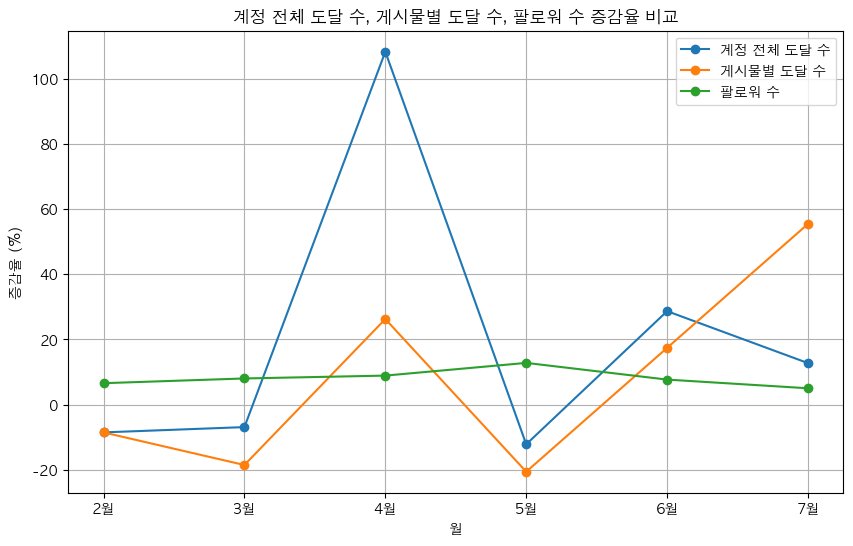

In [6]:
df_pct_change = df.set_index('월').pct_change().dropna() * 100

plt.figure(figsize=(10, 6))

plt.plot(df_pct_change.index, df_pct_change["계정 전체 도달 수"], label="계정 전체 도달 수", marker='o')
plt.plot(df_pct_change.index, df_pct_change["게시물별 도달 수"], label="게시물별 도달 수", marker='o')
plt.plot(df_pct_change.index, df_pct_change["팔로워 수"], label="팔로워 수", marker='o')

plt.xlabel("월")
plt.ylabel("증감율 (%)")
plt.title("계정 전체 도달 수, 게시물별 도달 수, 팔로워 수 증감율 비교")
plt.legend()
plt.grid(True)
plt.show()


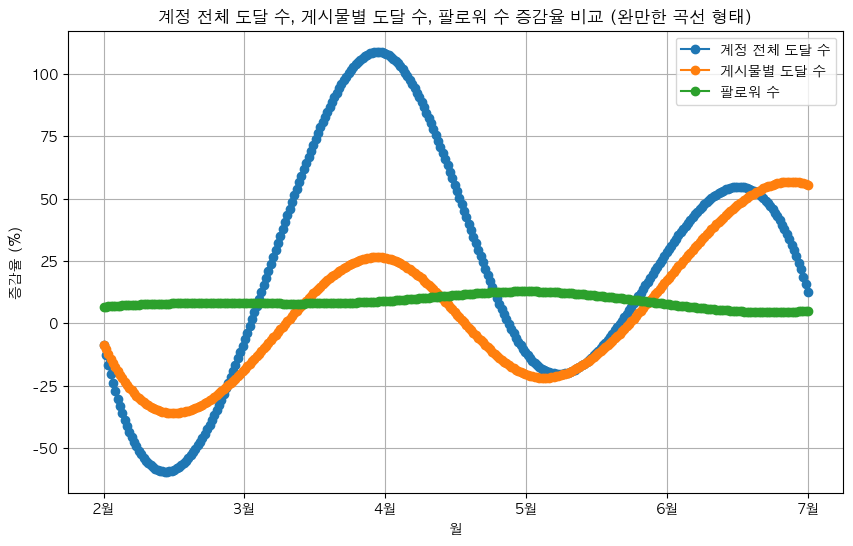

In [12]:
import numpy as np
from scipy.interpolate import make_interp_spline

x = np.arange(len(df_pct_change))
x_smooth = np.linspace(x.min(), x.max(), 300)

y1_smooth = make_interp_spline(x, df_pct_change["계정 전체 도달 수"])(x_smooth)
y2_smooth = make_interp_spline(x, df_pct_change["게시물별 도달 수"])(x_smooth)
y3_smooth = make_interp_spline(x, df_pct_change["팔로워 수"])(x_smooth)

plt.figure(figsize=(10, 6))

plt.plot(x_smooth, y1_smooth, label="계정 전체 도달 수", marker='o')
plt.plot(x_smooth, y2_smooth, label="게시물별 도달 수", marker='o')
plt.plot(x_smooth, y3_smooth, label="팔로워 수", marker='o')

plt.xticks(x, df_pct_change.index)
plt.xlabel("월")
plt.ylabel("증감율 (%)")
plt.title("계정 전체 도달 수, 게시물별 도달 수, 팔로워 수 증감율 비교 (완만한 곡선 형태)")
plt.legend()
plt.grid(True)
plt.show()
